### Running some models against the EMNIST data, blown to 224 x 224

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [13]:
arch = resnet34

sz = 224

bs = 32

PATH = "/home/apil/work/emnist224x244"

tfms = tfms_from_model(arch, sz, aug_tfms=[RandomScale(sz, max_zoom=1.0)])

data = ImageClassifierData.from_csv(PATH, 'train', PATH+'/emnist.csv', tfms=tfms, bs=bs)

learn = ConvLearner.pretrained(arch, data, precompute=True)

In [14]:
lrf= learn.lr_find()

 75%|███████▍  | 2101/2820 [00:40<00:13, 52.52it/s, loss=6.68] 

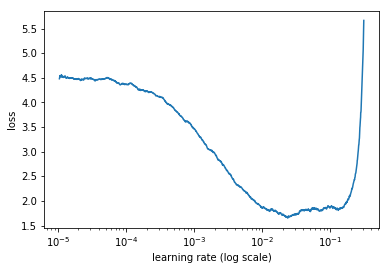

In [15]:
learn.sched.plot()

In [16]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy   
    0      1.085887   0.783622   0.751097  
    1      0.986865   0.707927   0.771045  


[array([0.70793]), 0.7710448158242305]

In [17]:
learn.fit(1e-2, 10,cycle_len=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.881079   0.664459   0.780442  
    1      0.827192   0.638057   0.795115  
    2      0.85703    0.631529   0.793298  
    3      0.792704   0.613863   0.800035  
    4      0.846439   0.613973   0.797243  
    5      0.742487   0.598411   0.805355  
    6      0.853743   0.599757   0.802828  
    7      0.73539    0.588017   0.807837  
    8      0.791457   0.595577   0.805488  
    9      0.7545     0.581716   0.810763  
    10     0.780966   0.584561   0.806995  
    11     0.723073   0.573439   0.811605  
    12     0.781633   0.576947   0.808546  
    13     0.693471   0.564779   0.814132  
    14     0.704512   0.570937   0.812891  
    15     0.690567   0.560845   0.817634  
    16     0.750539   0.565791   0.815018  
    17     0.680399   0.558517   0.817013  
    18     0.715338   0.565176   0.812979  
    19     0.663174   0.557978   0.816038  


[array([0.55798]), 0.8160379449153042]

In [18]:
learn.unfreeze()

In [19]:
lr=np.array([1e-4,1e-3,1e-2])

In [21]:
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.700552   0.552195   0.817855  
    1      0.68887    0.556481   0.815683  
    2      0.646443   0.549311   0.818432  
    3      0.738212   0.562745   0.813777  
    4      0.669484   0.546116   0.818831  
    5      0.642676   0.536458   0.822155  
    6      0.632165   0.535865   0.822111  
    7      0.727865   0.557342   0.814974  
    8      0.721186   0.554318   0.816127  
    9      0.716588   0.548144   0.8179    
    10     0.640773   0.540885   0.820515  
    11     0.677072   0.536524   0.822244  
    12     0.650436   0.532016   0.824106  
    13     0.610854   0.529675   0.824948  
    14     0.605071   0.529048   0.825524  
    15     0.691372   0.544133   0.818476  
    16     0.658852   0.54577    0.816659  
    17     0.661301   0.538944   0.821003  
    18     0.631526   0.538769   0.819584  
    19     0.669285   0.535257   0.820116  
    20     0.620798   0.532073   0.821978  
    21     0.611723   0.527214 

[array([0.5133]), 0.8302229708869373]